## Novelty Food Recommendations

**Author:** Gifty Singh 

**Contact:** gsndanalytics@gmail.com

**Date:** June 26th

Progress chart: This explains and identifies what steps I took to acheive my results for this recommendation.

In [1]:
import pandas as pd
from bokeh.models import BoxAnnotation
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

data = {
    'Week': ['May 1-14', 'May 15-Jun 4', 'Jun 5-19', 'Jun 20-23', 'Jun 24-25'],
    'Task': [
        'Data processing',
        'Key features & indicators',
        'Model training & evaluation',
        'A/b testing, Model refinement',
        'Next Steps'
    ],
    'Start': ['2023-05-01', '2023-05-15', '2023-06-05', '2023-06-20', '2023-06-24'],
    'End': ['2023-05-14', '2023-06-04', '2023-06-19', '2023-06-23', '2023-06-25']
}

df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

source = ColumnDataSource(df)

colors = ['navy', 'green', 'red', 'purple', 'orange']

p = figure(title="CAPSTONE Schedule", x_axis_type='datetime', y_range=df['Task'], plot_width=800, plot_height=400, tools="")

for indx, task in enumerate(df['Task']):
    task_source = ColumnDataSource(df[df['Task'] == task])
    p.hbar(y='Task', height=0.9, left='Start', right='End', color=colors[indx], source=task_source)

box = BoxAnnotation(left=pd.to_datetime('2023-05-01'), right=pd.to_datetime('2023-05-14'), fill_color='lightgreen', fill_alpha=0.1)
p.add_layout(box)

hover = HoverTool(tooltips=[("Task", "@Task"), ("Start", "@Start{%F}"), ("End", "@End{%F}")], formatters={"@Start": "datetime", "@End": "datetime"})
p.add_tools(hover)

p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Task"
p.ygrid.grid_line_color = None
p.xaxis.major_label_orientation = 1

show(p)


Loading BokehJS ...

## Table of Contents


<a id="0"></a> <br>
0.3 [Problem Space](#0.1)

0.4 [Exploring the Recipe Columns](#0.4)

0.5 [User Interactions Data](#0.5)


## Problem Space:

The initial phase of the project was centered around locating a rich and versatile data set, which would not only include real recipe names and detailed recipe information but also feature user interactions. A key source of such data was found on Kaggle, in a dataset provided by Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, and Julian McAuley. They generated recipes based on historical user data presented an intriguing perspective, however, our goal deviates by emphasizing on the novelty of recipes.

The inspiration for this novelty-centric approach stemmed from my consulting experience at Loblaws. It was clear from the beginning that their core operation focused heavily on their 'bread and butter' products, but a parallel stream of continuous ideation around new food pairings and product development was also evident. This presented a fascinating space to explore - the potential of discovering new food pairings and how they could be identified from raw ingredients. While this was a colossal undertaking, I decided to pivot my problem to understand how often can novelty be predicted based on historical recipe data, consumer behavior, and corresponding recommendations.

Before delving into the modeling phase, it was crucial to glean some knowledge on the approach taken. Rather than serving the results upfront, it felt necessary to further examine the dataset and paint a comprehensive picture of the recommendation journey. The goal is to not just present a recipe a user didn't know existed but also walk them through an exciting exploration of novel possibilities in their culinary adventures. The next phase of this project will dive deep into these aspects, fostering a more intimate understanding of the recipe recommendation system.

In [2]:
import numpy as np #importing numpy
import pandas as pd #importing pandas 
import matplotlib.pyplot as plt #import matplotlib 
#reads in the data, and sets the column widths as maximum inorder to be able to see the entire value of each cell
pd.set_option('display.max_colwidth', None)

**Recipe Data**

In [51]:
#reading in the recipe dataset with pandas as pd
Raw_recipes = pd.read_csv('Capstone/RAW_recipes.csv')

In [52]:
#let's how many columns this dataset has
Raw_recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

**Initial Assesment:**


Currently we are seeing a total of 230186 recipes that were scraped from Food.com by Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, and Julian McAuley.  There are 12 columns.


Recipe Columns are *'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients'.*

Let's view the data:

In [50]:
#This see the dataset, the columns and it's values
Raw_recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

## Exploring the Recipe Columns
**The following are the recipe columns and their representing values:**

**" Name "** - this is the name of the recipe.

**" id "** - this is the unique recipe id

**" minutes "** - How minutes does each recipe take

**" contributor_id "** - contributor's id of the recipe

**" submitted "** - when was this recipe submitted

**" tags "** - all the tags that associated with this recipe, cuisine type, what type of dish, regions

**" nutrition "** - Aggregated nutritional facts about the recipe 

            The following nutritional values are: 
            Calories (#)', 'Total Fat (PDV)', 'Sugar (PDV)', 'Sodium (PDV)', 'Protein (PDV)', 
            'Saturated Fat','Carbohydrates (PDV)'

**" n_steps "** - Number of steps it takes to make the recipe

**" steps "** - The actual steps to make the recipe in detail

**" description "** - someone's description of the recipe, talks about the aroma, the taste and others.

**" ingredients "** - All ingredients in the recipe

**" n_ingredients "** - Number of ingredients in the recipe

Quick note:  Before further any cleaning, I see 'tags', 'steps, 'description' and 'ingredients' require further text break down using regex.  While still exploring the numerical and dates columns within the dataset can be visualized to help with the understanding.  I'm doing this to plan out further avenues of testing if required.  However before making any concrete decisions I want to understand the data and the story it is creating with regards to the overall objective.

In [39]:
#Quick peak at the max values for Steps and Ingredients
print(Raw_recipes.max())

id                                                           537716
minutes                                                  2147483647
contributor_id                                           2002289981
submitted                                                2018-12-04
tags              ['weeknight', 'time-to-make', 'preparation', '...
nutrition              [999.9, 106.0, 53.0, 18.0, 131.0, 90.0, 9.0]
n_steps                                                         145
steps                                                            []
ingredients       ['zwieback toast', 'light brown sugar', 'butte...
n_ingredients                                                    43
dtype: object


/var/folders/3h/c9q_p3653g7088wkgdk7bfmm0000gn/T/ipykernel_49538/2128858955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Raw_recipes.max())


Nutrition is not a good example of this function effectiveness.  That aside:  N_steps = 145 & N_ingredients = 43 interms of max.  Let's take a look at both.

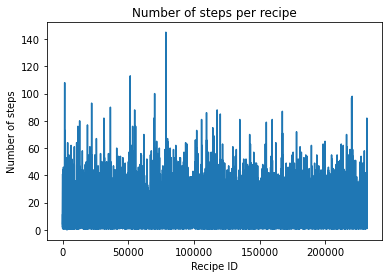

In [40]:
#Raw_recipes with the column name to plot the values
#added title, ylabel, xlabel

Raw_recipes["n_steps"].plot()
plt.title("Number of steps per recipe")
plt.ylabel("Number of steps")
plt.xlabel("Recipe ID")
#Shows the plot
plt.show()

In [73]:
#variable highlighting a unique characteristic in the data for a recipe with 145 steps
recipe_with_steps = Raw_recipes[Raw_recipes["n_steps"] == 145]

#display the recipe variable
recipe_with_steps

name      id  minutes  contributor_id  \
78633  easy yeast bread with variations  158120      210          182358   

        submitted  \
78633  2006-02-28   

                                                                                                        tags  \
78633  ['time-to-make', 'course', 'preparation', 'healthy', 'breads', 'dietary', 'yeast', '4-hours-or-less']   

                                             nutrition  n_steps  \
78633  [1784.5, 62.0, 104.0, 151.0, 103.0, 42.0, 99.0]      145   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Recipe with the most amount of steps is "Easy Yeast Bread with Variations" because it lists out a ton of variations if not all.

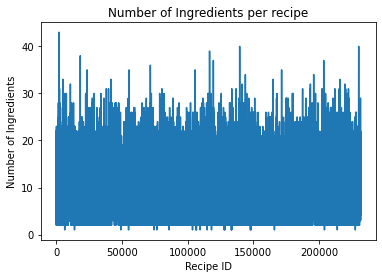

In [47]:
import matplotlib.pyplot as plt

#Raw_recipes with the column name to plot the values
#added title, ylabel, xlabel
Raw_recipes["n_ingredients"].plot()
plt.title("Number of Ingredients per recipe")
plt.ylabel("Number of Ingredients")
plt.xlabel("Recipe ID")
#Shows the plot
plt.show()

In [55]:
#variable highlighting a unique characteristic in the data for a recipe with 43 ingredients
recipe_with_ing = Raw_recipes[Raw_recipes["n_ingredients"] == 43]

#displays the recipes, calling out the variable
recipe_with_ing

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
2162,a to z bread,3748,80,1535,1999-10-30,"['time-to-make', 'course', 'main-ingredient', 'preparation', 'for-large-groups', 'low-protein', 'breads', 'fruit', 'oven', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-calorie', 'low-carb', 'quick-breads', 'low-in-something', 'tropical-fruit', 'pineapple', 'equipment', 'number-of-servings', '4-hours-or-less']","[367.0, 30.0, 101.0, 10.0, 9.0, 12.0, 14.0]",12,"['in a mixing bowl , combine the sugar , oil and eggs', 'mix well', 'stir in a-to-z ingredients of your choice and vanilla', 'combine flour cinnamon , baking powder , baking soda and salt', 'stir into liquid ingredients just until moistened', 'stir in nuts', 'pour into two greased 8-in', 'x 4-in', 'x 2-in', 'loaf pans', 'bake at 325 f for 55-65 minutes or until a wooden pick inserted near the center comes out clean', 'cool in pan 10 minutes before removing to a wire rack']",an extremely versatile bread. very moist and delicious. it's a great way to use up odd and ends of frozen berries.,"['sugar', 'vegetable oil', 'eggs', 'vanilla extract', 'all-purpose flour', 'cinnamon', 'baking powder', 'baking soda', 'salt', 'walnuts', 'apples', 'applesauce', 'apricots', 'bananas', 'carrots', 'cherries', 'fresh coconut', 'dates', 'eggplants', 'figs', 'seedless grapes', 'honey', 'lemon juice', 'marmalade', 'mincemeat', 'oranges', 'peaches', 'of fresh mint', 'pears', 'crushed pineapple', 'prune', 'canned pumpkin', 'raisins', 'raspberries', 'rhubarb', 'fresh strawberries', 'frozen strawberries', 'sweet potatoes', 'tapioca', 'tomatoes', 'yams', 'yogurt', 'zucchini']",43


The Recipe with the most ingredients is another bread recipe called the 'A to Z Bread' this ties in nicely inregards to what is happening within the data even the recipe names given some of these inherent characteristics.

In [60]:
# Create a DataFrame from the series
count_per_interval_df = pd.DataFrame(count_per_interval)
count_per_interval_df.reset_index(inplace=True)

# Rename the columns
count_per_interval_df.columns = ['Preparation Time Interval', 'Number of Recipes']

# Display the DataFrame
display(count_per_interval_df)

,Preparation Time Interval,Number of Recipes
0,0-30,97959
1,31-60,70077
2,61-90,29071
3,91-120,7612
4,121-150,6424
5,151-180,2012
6,181-210,3435
7,211-240,984


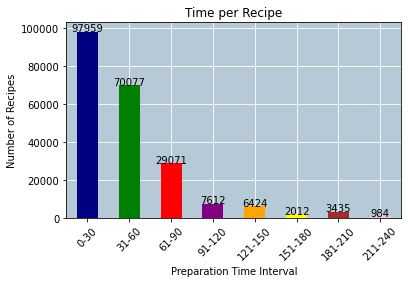

In [85]:
from IPython.display import Image, display
from IPython.display import HTML

# Create a figure and axes
fig, ax = plt.subplots()

# Increase the whitespace (you can adjust the bottom value as needed)
fig.subplots_adjust(bottom=0.2)

# Define colors for each interval
colors = ['navy', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'blue']  # adjust the colors as per your requirement

# Bar chart of preparation times
count_per_interval.plot(kind='bar', ax=ax, color=colors, zorder=3)
plt.xlabel("Preparation Time Interval")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)

# Add the text labels on top of the bars
for i, v in enumerate(count_per_interval):
    ax.text(i, v + 50, str(v), color='black', ha='center')

# Add a title
plt.title("Time per Recipe")

# Add grid and change the grid color to white
ax.grid(True, color='white', zorder=0)

# Change the background color to light blue
ax.set_facecolor('#b6c9d6')

# Save the figure to a file
fig.savefig('temp_plot.png')


Time per recipe classifaction is very unique and interesting, first off look at the majority of the recipes that are in our data set - 98000 of them only require 30 minutes of cook time.  70k require 31-60, and only 30k take more than an hour.  Another surprising call out is 181-210 minutes!

In [72]:
#recipes_in_range time interval 181-210 
#shows the type of recipes for that range
recipes_in_range = Raw_recipes[Raw_recipes['time_interval'] == '181-210']
recipes_in_range.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,time_interval
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['mix all ingredients& boil for 2 1 / 2 hours , or until thick', 'pour into jars', ""i use'old' glass ketchup bottles"", ""it is not necessary for these to'seal"", ""'my amish mother-in-law has been making this her entire life , and has never used a'sealed' jar for this recipe , and it's always been great !""]","my dh's amish mother raised him on this recipe. he much prefers it over store-bought ketchup. it was a taste i had to acquire, but now my ds's also prefer this type of ketchup. enjoy!","['tomato juice', 'apple cider vinegar', 'sugar', 'salt', 'pepper', 'clove oil', 'cinnamon oil', 'dry mustard']",8,181-210
139,rter med flsk pea soup with pork,333797,195,64642,2008-10-29,"['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', '5-ingredients-or-less', 'soups-stews', 'beans', 'american', 'easy', 'beginner-cook', 'dietary', 'comfort-food', 'midwestern', 'inexpensive', 'free-of-something', 'taste-mood', 'savory', 'presentation', 'served-hot', '4-hours-or-less']","[160.4, 11.0, 0.0, 34.0, 44.0, 12.0, 0.0]",5,"['soak peas overnight , drain and add 3 quarts water', 'bring to a boil and cook rapidly', 'skim off any skins', 'after cooking for an hour , add pork and simmer and simmer for 2 hours or until pork is tender', 'add seasonings']","a hearty and comforting soup from the minnesota scandinavian chapter of the united states regional cookbook, culinary arts institute of chicago, 1947. overnight soaking not included in preparation time.","['dried yellow peas', 'water', 'salt', 'pork', 'ginger']",5,181-210
147,ant kelly s london broil marinade,155959,200,59476,2006-02-13,"['time-to-make', 'main-ingredient', 'preparation', 'occasion', 'very-low-carbs', 'beef', 'barbecue', 'dietary', 'high-protein', 'low-carb', 'high-in-something', 'low-in-something', 'meat', 'to-go', 'equipment', 'grilling', '4-hours-or-less']","[673.5, 61.0, 18.0, 67.0, 133.0, 57.0, 2.0]",13,"['mix all marinade ingredients together', 'lightly score meat in a diamond pattern on each side', 'place meat in a resealable bag', 'pour in marinade', 'squish meat and marinade around to get all the nooks and crannies', 'marinate in refrigerator 2-3 hours or up to 24 hours , rotating occasionally', 'can be frozen in the marinade too', '20-30 minutes before cooking take meat out of the refrigerator to come up in temperature', 'cook in the broiler or on the grill on high heat for 5-7 minutes per side depending on thickness and desired doneness', 'i have been asked about roasting temperatures , i have never done this , always grill or broil', 'for camping - place the fresh london broil and marinade in a zipperbag , squeeze out as much air as possible , seal , place inside a vacuum pack bag', 'vacuum pack and freeze', 'put frozen in the camping cooler , after a day or two it is defrosted and can be cooked on the grill with minimal preparation and mess']","my niece shwana loves this! she always writes my name ""ant"" kelly when we play rummy or scrabble - started when she was little and stuck. \r\ni always make this when we go tubing in wisconsin. \r\n\r\nprep time includes does not include time to marinate.","['balsamic vinegar', 'soy sauce', 'worcestershire sauce', 'olive oil', 'garlic cloves', 'rosemary', 'fresh ground black pepper', 'london broil beef']",8,181-210
165,cancer curing matzah ball soup,269984,195,669653,2007-12-05,"['time-to-make', 'course', 'preparatio

I see, so these recipes require more time due to their uniqueness in preparation- I see further details in relating columns which talk about soaking the oats overnight and marinating a certain aspect of the dish a day before.


These are more complex dishes and their finer details are critical not just the classification of time.  So this is something that we cannot just ignore.  Does time as antribute rely on the type of dish to recommend; in my view and for the purpose of this assignment it is not.

When a person thinks of something 'New' they want to eat, time is not the highest on the list.  With that practicality in mind lets move towards further exploration.

## User Interactions Data

In [8]:
#reading in the recipe dataset with pandas as pd
Raw_ints = pd.read_csv('RAW_interactions.csv')

In [9]:
#lets a have a quick look at the table
Raw_ints.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


Fairly small table in terms of columns but what is the overall size of this?

In [10]:
Raw_ints.shape

(1132367, 5)

The rating visual is critical here:

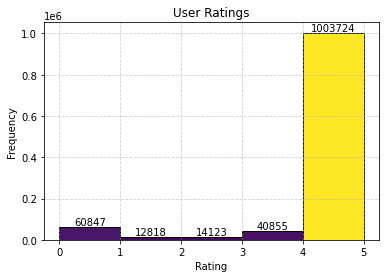

In [16]:
import numpy as np

# Define bins
bins = np.arange(0, 6, 1)

# Create a histogram
n, bins, patches = plt.hist(Raw_ints['rating'], bins=bins, edgecolor='black')

# We need to normalize n because colors are mapped to the range 0..1
n = n / max(n)

# Create a colormap
cmap = plt.get_cmap('viridis')

# Set color for each bar
for i in range(len(patches)):
    patches[i].set_facecolor(cmap(n[i]))

# Add totals on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             f'{int(patches[i].get_height())}', ha='center', va='bottom')

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Set labels
plt.title('User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The data has 1.1 million user interactions and 5 columns and this lets me know there's a lot more to the data than meets the eye.  I'm not sure how many of the users are unique, how many have duplicate responses, how many are valid or invalid. This will be the focus for our clean.

*Quick note:  User data is mainly important for rating.  It's great to see the reviews here which can give me suggestions for more features.  However given the time at hand having user's and their ratings was sufficient to start our recommender.*


*For future cleaning:  I would consider the values in 'review' column with more time and care.  A critical piece is to not assume what ratings could mean for the all the users since individual biases exist.  In a way this problem makes recommendation systems more unique since constant flow of information can have an effect on the overall output.*


**conclusion**

It must be stated that regarldess of the type of recommendation - the fact that most users have 5 ratings says a lot about the value this data brings.  Due to the majority of the ratings in the 5th classification and a significant amount in 0 classification; relying only on users would not be a good idea.